# **Pregnancy-Associated Mortality by Race/Ethnicity: Exploratory Analysis of New York City Through Data Storytelling**

# **Overview**
### **Introduction and Limitations**
Pregnancy-Associated Mortality in the City of New York Dataset: https://catalog.data.gov/dataset/pregnancy-associated-mortality

<br>

My research is focused on what factors affect pregnancy-related mortality, with a specific focus on race and ethnicity, and if certain groups are more likely to experience higher rates of mortality. I began my search on data.gov, which is an open data repository. It was important for me to look for open data so that I can contribute to the conversation related to this research in a meaningful and collaborative way, one that fosters accesibility and transparency. My interest in this topic lies in my curiosity about the underlying effects of race and bias in healthcare, as well as the experience of marginalized people in facets of their lives that are less understood or acknowledged. I chose this particular dataset because it is both simple and informative, and gives insight into populations of people who not only need consistent healthcare, but are in a vulnerable and potentially fatal condition, where their quality of care, and the factors that contribute to it, can directly inpact their outcomes and lives.  

<br>

After searching through the pages of data.gov, I came across the pregnancy-associated mortality data from the City of New York, which is updated annually and spans from 2016 to 2021. I was inclined to use this dataset because of its high level of data integrity, coming from the City of New York's Department of Health and Mental Hygiene (DOHMH), as well as because of the variance in the demographic representation resulting from the geographic scope of the data. The data comes from a combination of vital records, including death certificates, linking vital records, medical examiner records, and discharge data, as well as the review from the Maternal Mortality and Morbidity Review Comittee (M3RC), which reviews each pregnancy-related death from 40 expert perspectives of clinical and social determinants.

<br>

This dataset was complied by the DOHMH and created in October 2020, being last updated in October 2024. It spans the state of New York, focusing on the five boroughs, and then the rest of the state, limiting the rest of the state to a large generalization and the data as a whole to New York state. This limits the application of this analysis, as well as its implications. It is also restricted to data from 2016-2021, despite being maintained and updated annually. That means that there is no data from the past four years in this dataset, limiting its relevance to the time-period mentioned. Another limitation is the lack of specificity in some races/ethnicities, and lack of representation for people with multiple, or that identify with other categories. This is due to an over-generalization in the process of data collection, and limits the understanding that can be gained from analysis of this data.

<br>

The dataset has 236 rows and 6 columns, using variables to represent the five boroughs, year, whether the death is pregnancy-related, what the underlying cause was (if applicable), race/ethnicity, and number of deaths. All variables aside from deaths, which is a float/number, are originally character/text data types, and there is one NA in the data.

<br>

Based on the dataset and limitations of the data, I intend to make use of highlighting its contrasts to visualize and analyze the data. I will focus on the number of deaths, how it is related to race/ethnicity, and how that relationship changes over the time period of recorded data, so I will need to center my analysis on the Race.ethnicity, Deaths, and Year features. Prior to analysis, I expect to see that black women are suscptible to higher mortality rates, and that white women are susceptiple to lower ones.


# **Data Analysis**


We will start our analysis by reading in the data from the CSV file and turning it into and R dataframe. Then, we will run dim() and summary() to display the size of the dataset (rows, columns) and summary statistics, respectfully.

In [ ]:
# Load library tidyverse for visualizations and preprocessing, read in csv data -> turn into R dataframe
# Note: Don't worry about any dplyr conflicts, it is not used

library(tidyverse)

pregnancy.df <- read.csv("Pregnancy-Associated_Mortality.csv")
pregnancy.df <- as.data.frame(pregnancy.df)

In [ ]:
# Dim to display size of dataset, summary to display summary for all variables

dim(pregnancy.df)
summary(pregnancy.df)

[1] 236   6

     Year             Related          Underlying_cause   Race.ethnicity    
 Length:236         Length:236         Length:236         Length:236        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   Borough              Deaths      
 Length:236         Min.   : 0.000  
 Class :character   1st Qu.: 2.000  
 Mode  :character   Median : 3.000  
                    Mean   : 5.017  
                    3rd Qu.: 6.500  
                    Max.   :26.000  
                    NA's   :1       

We can see that there is one NA in the deaths column, which we will remove. We can also see summaries of all of the features/variables, as well as the target feature, which is Deaths. We will be taking a closer look at Race.ethnicity, Related, Underlying_cause, and Deaths. We can already see some information on Deaths, such as the minimum being zero, the maximum being 26, and the mean being 5.017.

In [ ]:
# Remove NA and run dim() and summary() again to make sure it was removed

pregnancy.df <- na.omit(pregnancy.df)
dim(pregnancy.df)
summary(pregnancy.df)

[1] 235   6

     Year             Related          Underlying_cause   Race.ethnicity    
 Length:235         Length:235         Length:235         Length:235        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
   Borough              Deaths      
 Length:235         Min.   : 0.000  
 Class :character   1st Qu.: 2.000  
 Mode  :character   Median : 3.000  
                    Mean   : 5.017  
                    3rd Qu.: 6.500  
                    Max.   :26.000  

You can see that all of the categorical variables are currently stored as characters, which we cannot work with, so we are going to turn each categorical variable into a factor to help R can understand them better. We will check the dim() and summary() functions again, to ensure that everything looks correct.

In [ ]:
# Turn each character variable into a factor, check dim and summary again to make sure everything looks right

pregnancy.df$Year <- factor(pregnancy.df$Year, levels = c(2016, 2017, 2018, 2019, 2020, 2021))
pregnancy.df$Related <- factor(pregnancy.df$Related)
pregnancy.df$Underlying_cause <- factor(pregnancy.df$Underlying_cause)
pregnancy.df$Race.ethnicity <- factor(pregnancy.df$Race.ethnicity)
pregnancy.df$Borough <- factor(pregnancy.df$Borough)

dim(pregnancy.df)
summary(pregnancy.df)

[1] 235   6

   Year                                    Related  
 2016:33   All                                 :62  
 2017:43   Pregnancy-associated but not related:36  
 2018:40   Pregnancy-related                   :88  
 2019:44   Pregnancy-Related                   :19  
 2020:38   Unable to Determine                 :30  
 2021:37                                            
                                                    
                                                              Underlying_cause
 All                                                                  :121    
 Cardiovascular Conditions                                            : 14    
 Mental Health Conditions (Overdose related to substance use disorder): 14    
 Infection/Sepsis                                                     : 12    
 Other                                                                : 12    
 Unknown COD                                                          : 10    
 (Other)               

Now that we have a better idea of what the data looks like, we are going to create an intuitive box and whisker plot to visualize the relationship between Race.ethnicity and Deaths.

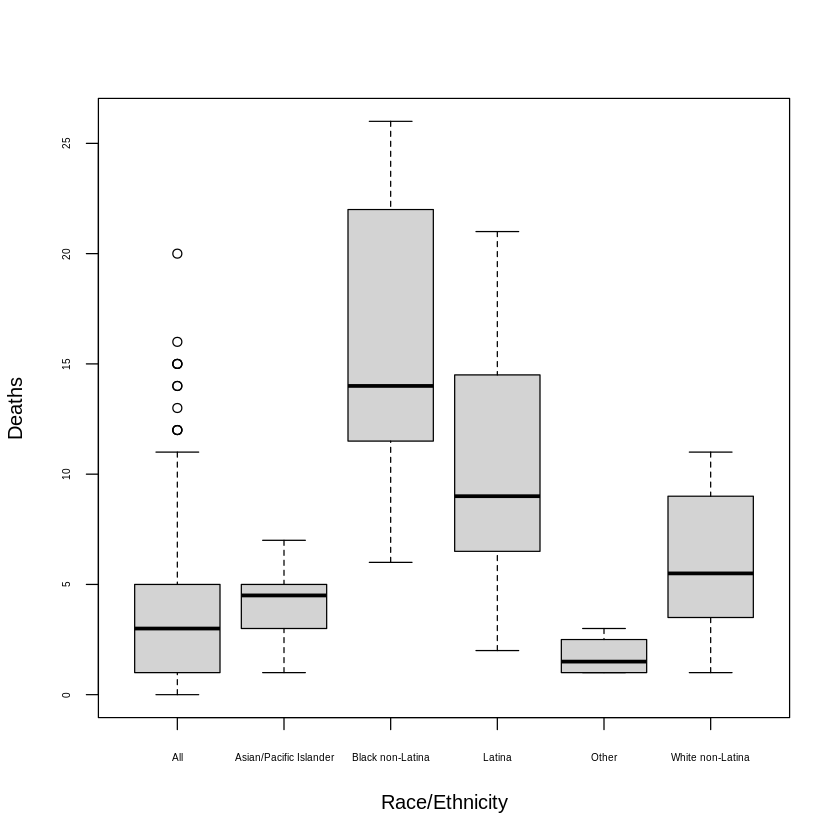

In [ ]:
# Create a plot for Deaths x Race.ethnicity

plot(pregnancy.df$Race.ethnicity, pregnancy.df$Deaths, cex.axis= 0.5, xlab = "Race/Ethnicity", ylab = "Deaths")

After looking at that breakdown of the overall data, centered around what we are investigating, we are going to separate the data into subsets by race to get a more comprehensive visualization.

In [ ]:
# Separate each race/ethnicity category into its own dataframe and only include pregnancy-related deaths, and then arrange them in ascending order by Year

black_mortality <- subset(pregnancy.df, Race.ethnicity == "Black non-Latina" & (Related == "Pregnancy-related" | Related == "Pregnancy-Related") )
black_mortality %>%
  arrange(Year)
white_mortality <- subset(pregnancy.df, Race.ethnicity == "White non-Latina" & (Related == "Pregnancy-related" | Related == "Pregnancy-Related") )
white_mortality %>%
  arrange(Year)
asian_mortality <- subset(pregnancy.df, Race.ethnicity == "Asian/Pacific Islander" & (Related == "Pregnancy-related" | Related == "Pregnancy-Related") )
asian_mortality %>%
  arrange(Year)
latina_mortality <- subset(pregnancy.df, Race.ethnicity == "Latina" & (Related == "Pregnancy-related" | Related == "Pregnancy-Related") )
latina_mortality %>%
  arrange(Year)
other_mortality <- subset(pregnancy.df, Race.ethnicity == "Other" & (Related == "Pregnancy-related" | Related == "Pregnancy-Related") )
other_mortality %>%
  arrange(Year)

Year,Related,Underlying_cause,Race.ethnicity,Borough,Deaths
<fct>,<fct>,<fct>,<fct>,<fct>,<int>
2016,Pregnancy-related,All,Black non-Latina,All,6
2017,Pregnancy-related,All,Black non-Latina,All,10
2018,Pregnancy-related,All,Black non-Latina,All,13
2019,Pregnancy-related,All,Black non-Latina,All,13
2020,Pregnancy-related,All,Black non-Latina,All,12
2021,Pregnancy-related,All,Black non-Latina,All,11


Year,Related,Underlying_cause,Race.ethnicity,Borough,Deaths
<fct>,<fct>,<fct>,<fct>,<fct>,<int>
2016,Pregnancy-related,All,White non-Latina,All,1
2017,Pregnancy-related,All,White non-Latina,All,1
2018,Pregnancy-related,All,White non-Latina,All,5
2019,Pregnancy-related,All,White non-Latina,All,6
2020,Pregnancy-related,All,White non-Latina,All,4
2021,Pregnancy-related,All,White non-Latina,All,3


Year,Related,Underlying_cause,Race.ethnicity,Borough,Deaths
<fct>,<fct>,<fct>,<fct>,<fct>,<int>
2016,Pregnancy-related,All,Asian/Pacific Islander,All,2
2017,Pregnancy-related,All,Asian/Pacific Islander,All,1
2018,Pregnancy-related,All,Asian/Pacific Islander,All,3
2020,Pregnancy-related,All,Asian/Pacific Islander,All,4
2021,Pregnancy-related,All,Asian/Pacific Islander,All,5


Year,Related,Underlying_cause,Race.ethnicity,Borough,Deaths
<fct>,<fct>,<fct>,<fct>,<fct>,<int>
2016,Pregnancy-related,All,Latina,All,6
2017,Pregnancy-related,All,Latina,All,6
2018,Pregnancy-related,All,Latina,All,2
2019,Pregnancy-related,All,Latina,All,9
2020,Pregnancy-related,All,Latina,All,9
2021,Pregnancy-related,All,Latina,All,11


Year,Related,Underlying_cause,Race.ethnicity,Borough,Deaths
<fct>,<fct>,<fct>,<fct>,<fct>,<int>
2017,Pregnancy-related,All,Other,All,1


Let's graph black and white mortality rates over years and see how they compare to what we expected.

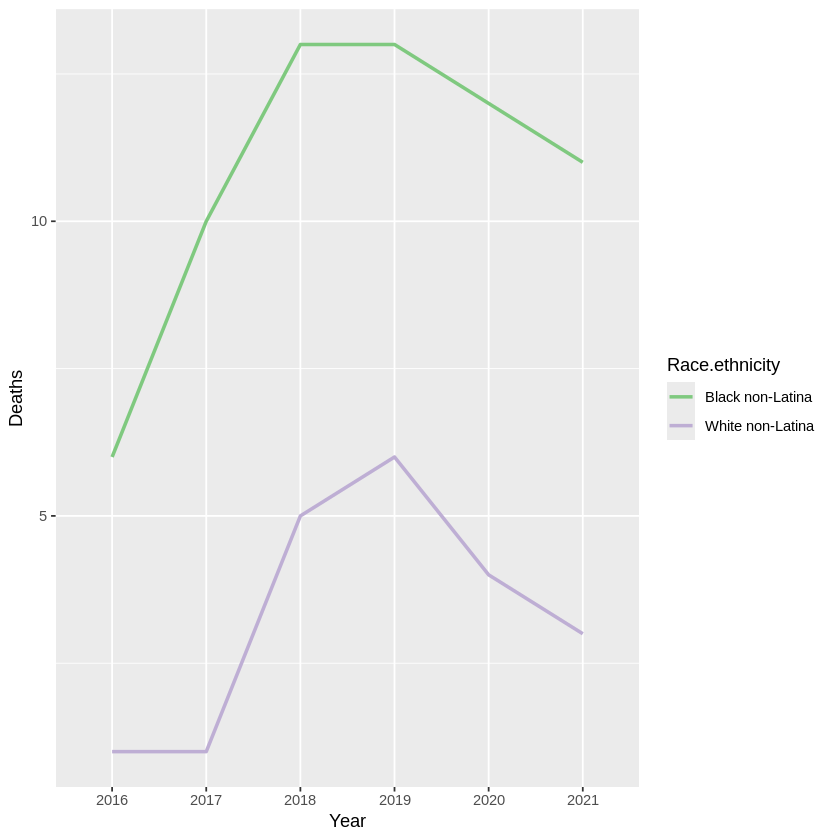

In [ ]:
# Create a plot of black vs white mortality rates over Years using ggplot

ggplot() +
  geom_line(data = black_mortality, aes(x = Year, y = Deaths, group = Race.ethnicity, color = Race.ethnicity), linewidth = 1) +
  geom_line(data = white_mortality, aes(x = Year, y = Deaths, group = Race.ethnicity, color = Race.ethnicity), linewidth = 1) +
  scale_color_brewer(palette="Accent")

Now, we can create a graph with all race subsets and see how the deaths vary over the years overall. This gives us a larger, but more detailed, overview of the data.

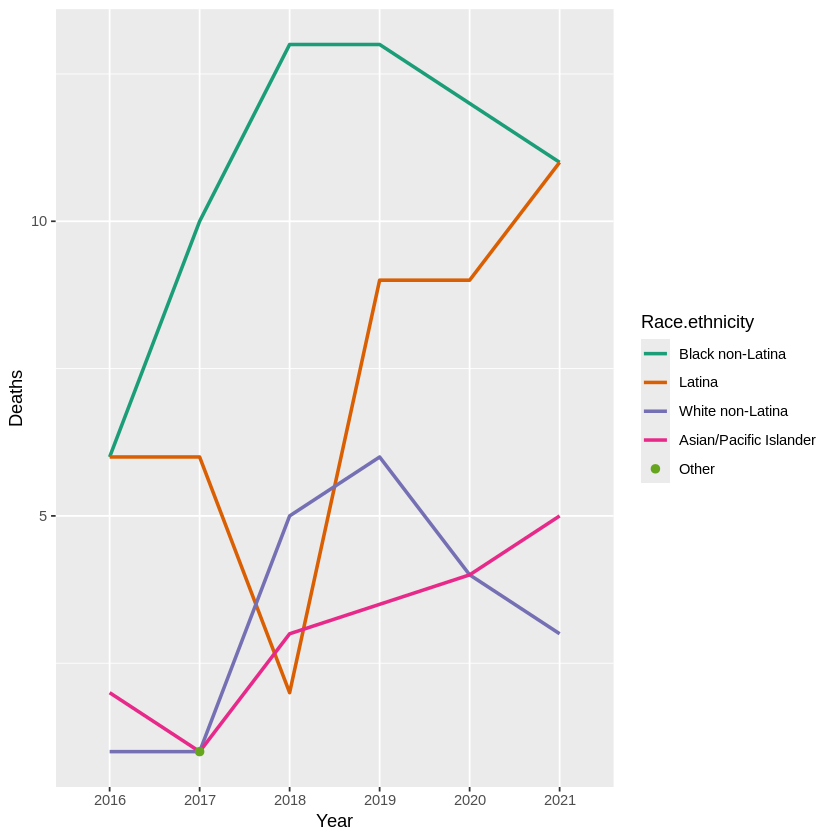

In [ ]:
# Create a plot with all races' mortality rates over Years

random_binom <- rbinom(100, size = 10, prob = 0.5)

ggplot() +
  geom_line(data = black_mortality, aes(x = Year, y = Deaths, group = Race.ethnicity, color = Race.ethnicity), linewidth = 1) +
  geom_line(data = latina_mortality, aes(x = Year, y = Deaths, group = Race.ethnicity, color = Race.ethnicity), linewidth = 1) +
  geom_line(data = white_mortality, aes(x = Year, y = Deaths, group = Race.ethnicity, color = Race.ethnicity), linewidth = 1) +
  geom_line(data = asian_mortality, aes(x = Year, y = Deaths, group = Race.ethnicity, color = Race.ethnicity), linewidth = 1) +
  geom_point(data = other_mortality, aes(x = Year, y = Deaths, group = Race.ethnicity, color = Race.ethnicity), size = 2) +
  scale_color_brewer(palette="Dark2")

# **Discussion**
The results of this data analysis are that black non-Latina and Latina women experience the highest rates of pregnancy associated-mortality overall, with white and Asian women experiencing lower ones, and black women experiencing a disproportiately higher rate than anyone else. Further research to elaborate on the implications of this analysis includes whether this is the result of women of these demographics being systemically denied access to proper healthcare, if they are delegated to economically underpriviliged areas, and if they are being taken seriously by medical professionals, all of which would restrict their access to resources, as well as potentially increase their likelihood of pregnancy-related mortality. Looking into the economic breakdown of these people as individuals, as well as further data regarding their demographics, such as immigration status, information about their last doctor's appointment, and the GDP of their neighborhood, are further steps to extend this analysis. These factors would disproportionately affect women of color, and contribute to the non-white experience in this area, and the culmination of these components could impact people in the most critical way— life or death. This further research can be sourced from the US Department of Health, US Department of Housing and Urban Development, and the US Census Bureau, and from data.gov.

<br>



